In [80]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import skew, kurtosis, mode
import matplotlib.pyplot as plt

In [81]:
df = pd.read_excel('../data/bank_combined.xlsx', sheet_name = 1)

In [82]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,month_number
0,40,543.0,2,349,2,262.0,275,2
1,46,1085.0,15,523,2,353.0,58,5
2,37,432.0,6,386,3,776.0,55,7
3,31,358.0,30,68,3,256.0,51,1
4,27,821.0,16,23,1,778.0,41,9


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           45211 non-null  int64  
 1   balance       45161 non-null  float64
 2   day           45211 non-null  int64  
 3   duration      45211 non-null  int64  
 4   campaign      45211 non-null  int64  
 5   pdays         8257 non-null   float64
 6   previous      45211 non-null  int64  
 7   month_number  45211 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


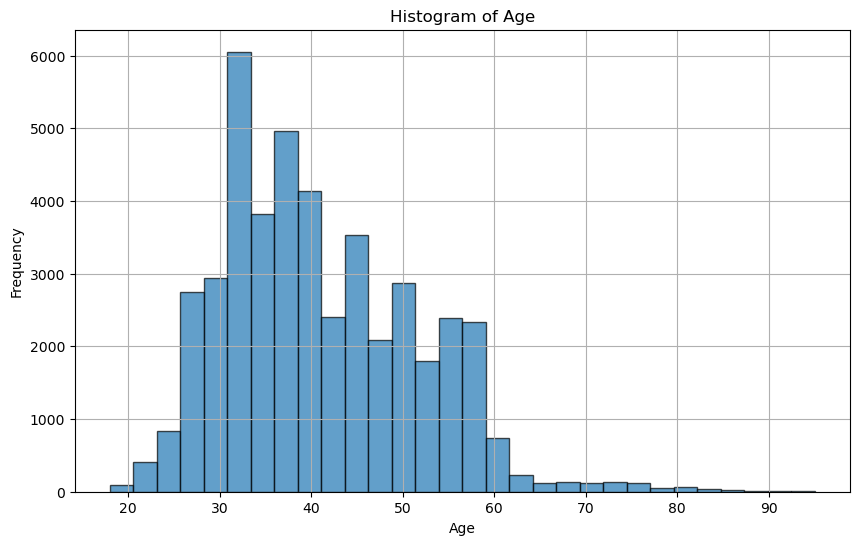

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

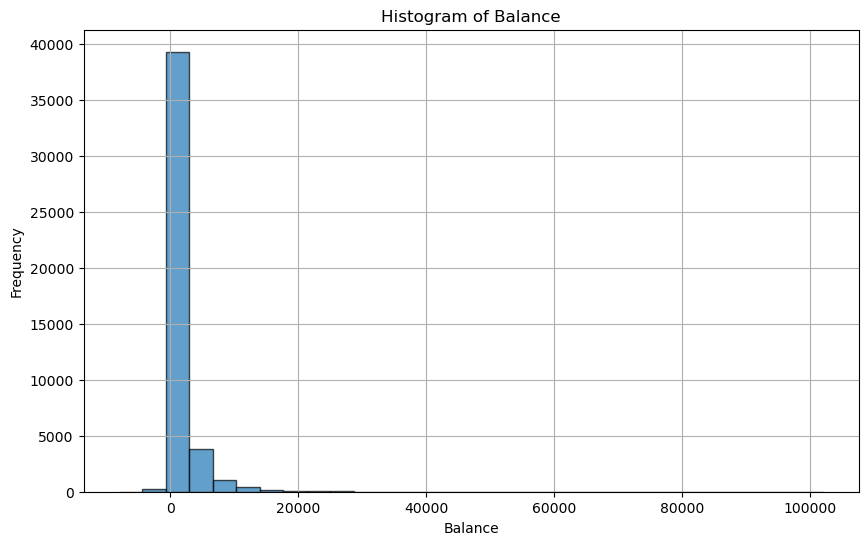

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df['balance'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

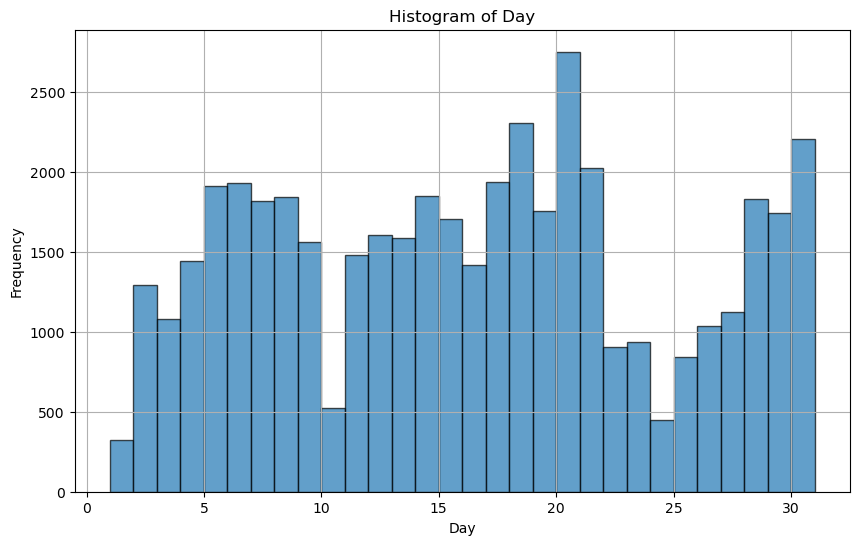

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['day'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

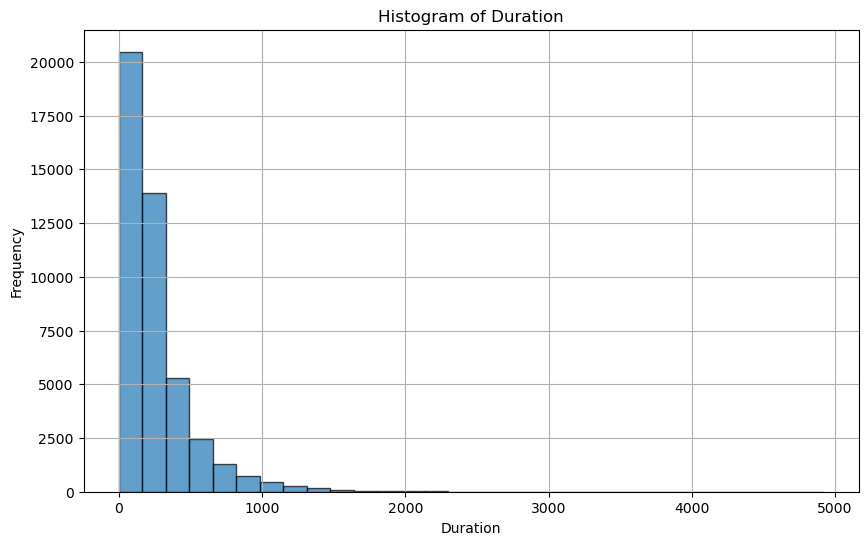

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

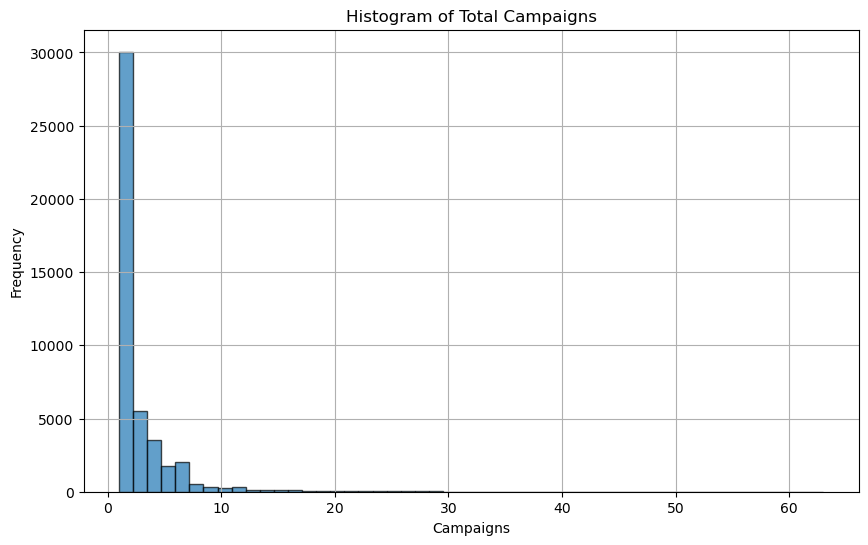

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['campaign'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Contacts During Campaigns')
plt.xlabel('Contacts During Campaigns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['campaign'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Contacts During Campaigns')
plt.xlabel('Contacts During Campaigns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

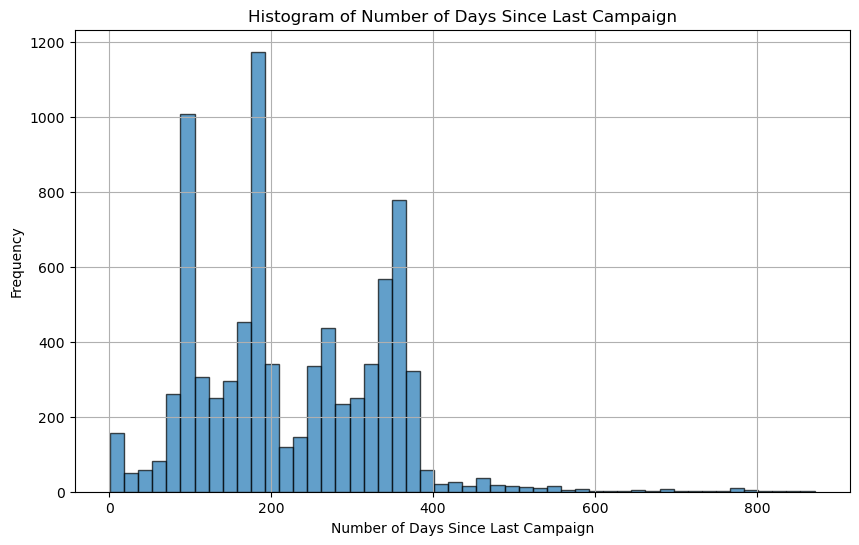

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df['pdays'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Number of Days Since Last Campaign')
plt.xlabel('Number of Days Since Last Campaign')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

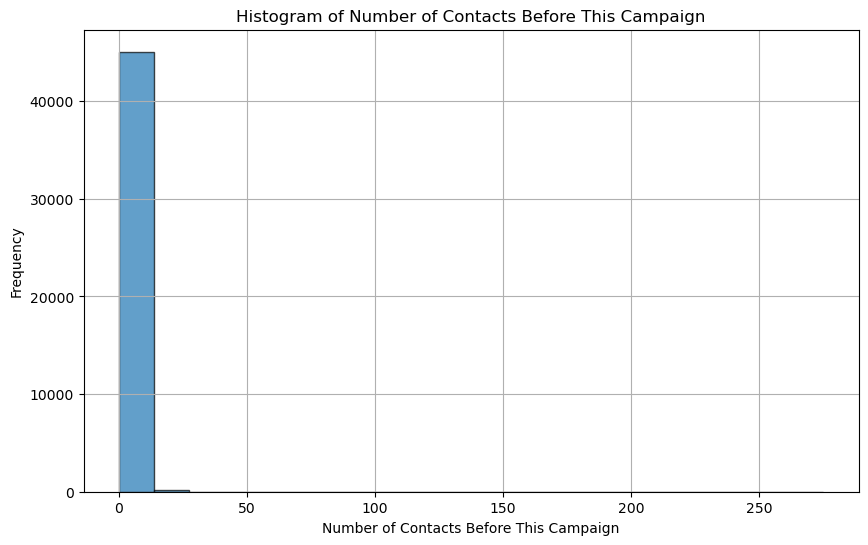

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['previous'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Number of Contacts Before This Campaign')
plt.xlabel('Number of Contacts Before This Campaign')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

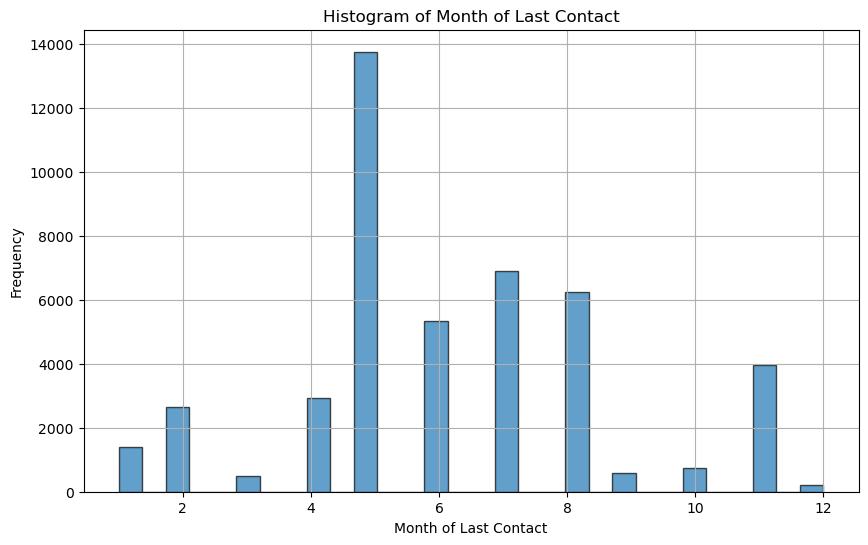

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df['month_number'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Month of Last Contact')
plt.xlabel('Month of Last Contact')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 'age' bootstrap
### n = 1000

In [7]:
n_bootstrap_samples = 1000
sample_size = 45211

bootstrap_samples = np.empty((n_bootstrap_samples, sample_size))

for i in range(n_bootstrap_samples):
    bootstrap_samples[i] = np.random.choice(df['age'], size=sample_size, replace=True)

print(bootstrap_samples)

[[39. 41. 46. ... 34. 53. 35.]
 [59. 40. 45. ... 58. 31. 26.]
 [52. 31. 37. ... 48. 41. 47.]
 ...
 [44. 33. 33. ... 54. 42. 26.]
 [40. 49. 39. ... 40. 35. 56.]
 [41. 30. 58. ... 39. 35. 83.]]


In [16]:
with open('../data/bootstrap_samples_n1000.pkl', 'wb') as f:
    pickle.dump(bootstrap_samples, f)

In [14]:
bootstrap_means = np.mean(bootstrap_samples, axis=1)
bootstrap_means.shape

(1000,)

In [15]:
print(bootstrap_means)

[40.95297605 40.92473071 40.97303754 40.80938267 40.90354117 40.98449492
 40.95047665 40.88208622 40.95981067 40.92110327 41.00161465 40.97936343
 40.88443078 40.84404238 40.95105174 40.99150649 40.89606512 40.92393444
 40.91378204 40.95098538 40.85421689 40.97193161 40.97235186 40.94726947
 40.9782575  40.97900953 40.91756431 40.90059941 41.02373316 40.90026763
 40.92884475 40.95852779 40.85182809 41.01742939 40.83375727 40.89752494
 41.03249209 40.91296366 41.01119197 40.87239831 40.95392714 40.97606777
 40.9500564  40.81820796 40.97571387 40.88750525 40.98739245 41.03359802
 40.91249917 40.8772865  40.9146889  40.87606998 40.95651501 40.98332264
 41.00369379 40.890071   40.93468404 40.96912256 41.00769724 40.88288248
 40.95472341 40.9328482  40.95702373 40.87144721 40.94722523 40.87761828
 40.93034881 40.93809029 40.8588839  40.99933644 40.93311362 40.98179647
 40.89316759 40.86925748 40.96036363 40.9703612  40.93096813 40.96848112
 41.00650284 40.94488067 40.91610449 40.95450222 40

In [17]:
# with open('../data/bootstrap_means_n1000.pkl', 'wb') as f:
#     pickle.dump(bootstrap_means, f)

In [42]:
with open('../data/bootstrap_means_n1000.pkl', 'rb') as f:
    bootstrap_means = pickle.load(f)

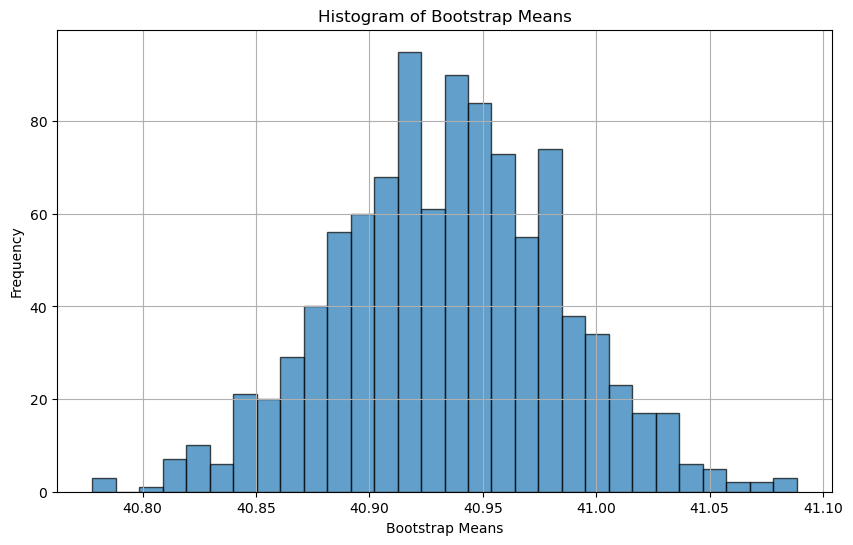

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Bootstrap Means')
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram
plt.show()

In [43]:
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means, ddof=1)
se = std / np.sqrt(len(bootstrap_means))
median = np.median(bootstrap_means)
mode_value = mode(bootstrap_means).mode[0]
variance = np.var(bootstrap_means, ddof=1)
skewness = skew(bootstrap_means)
kurtosis_value = kurtosis(bootstrap_means)
range_value = np.ptp(bootstrap_means)
min_value = np.min(bootstrap_means)
max_value = np.max(bootstrap_means)
sum_value = np.sum(bootstrap_means)
count_value = len(bootstrap_means)
largest_value = np.max(bootstrap_means)
smallest_value = np.min(bootstrap_means)
confidence_level_95 = 1.96 * se

C:\Users\brigi\AppData\Local\Temp\ipykernel_39360\2024595788.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(bootstrap_means).mode[0]


In [45]:
age_stats_n1000_df = pd.DataFrame({
    'Statistic': [
        'Mean', 'Standard Error', 'Median', 'Mode', 'Standard Deviation', 
        'Sample Variance', 'Kurtosis', 'Skewness', 'Range', 'Minimum', 
        'Maximum', 'Sum', 'Count', 'Largest(1)', 'Smallest(1)', 'Confidence Level(95.0%)'
    ],
    'Value': [
        mean, se, median, mode_value, std, 
        variance, kurtosis_value, skewness, range_value, min_value, 
        max_value, sum_value, count_value, largest_value, smallest_value, confidence_level_95
    ]
})

In [46]:
age_stats_n1000_df

,Statistic,Value
0,Mean,40.934709
1,Standard Error,0.001569
2,Median,40.935668
3,Mode,40.919843
4,Standard Deviation,0.049622
5,Sample Variance,0.002462
6,Kurtosis,0.017799
7,Skewness,-0.010105
8,Range,0.310544
9,Minimum,40.777842


### n = 10,000

In [68]:
n_bootstrap_samples = 10000

bootstrap_samples = np.empty((n_bootstrap_samples, sample_size))

for i in range(n_bootstrap_samples):
    bootstrap_samples[i] = np.random.choice(df['age'], size=sample_size, replace=True)

print(bootstrap_samples)

[[32. 30. 52. ... 34. 59. 34.]
 [53. 41. 37. ... 39. 31. 29.]
 [43. 35. 55. ... 37. 39. 38.]
 ...
 [46. 47. 25. ... 37. 29. 28.]
 [52. 50. 31. ... 49. 38. 50.]
 [46. 25. 48. ... 40. 65. 34.]]


In [69]:
# with open('../data/bootstrap_samples_n10000.pkl', 'wb') as f:
#     pickle.dump(bootstrap_samples, f)

In [70]:
with open('../data/bootstrap_samples_n10000.pkl', 'rb') as f:
    bootstrap_samples = pickle.load(f)

In [71]:
bootstrap_means = np.mean(bootstrap_samples, axis=1)
bootstrap_means.shape

(10000,)

In [72]:
# with open('../data/bootstrap_means_n10000.pkl', 'wb') as f:
#     pickle.dump(bootstrap_means, f)

In [77]:
with open('../data/bootstrap_means_n10000.pkl', 'rb') as f:
    bootstrap_means = pickle.load(f)

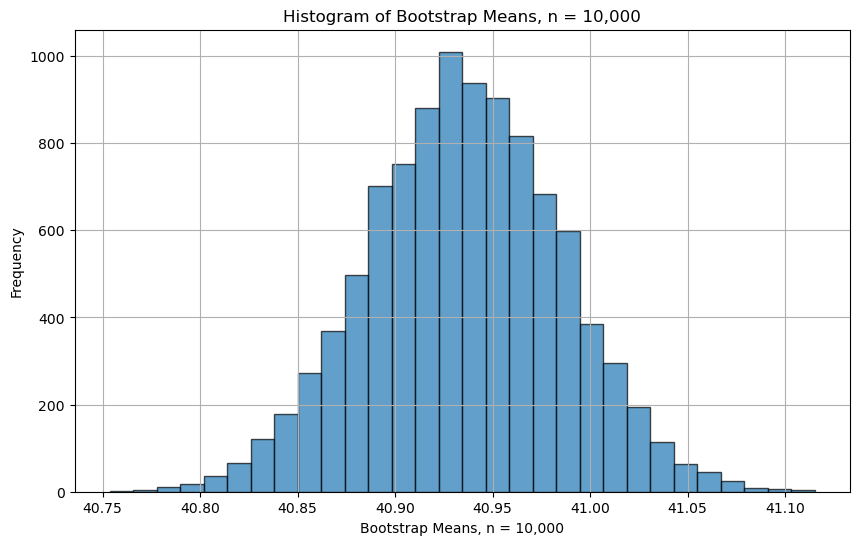

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Bootstrap Means, n = 10,000')
plt.xlabel('Bootstrap Means, n = 10,000')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram
plt.show()

In [74]:
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means, ddof=1)
se = std / np.sqrt(len(bootstrap_means))
median = np.median(bootstrap_means)
mode_value = mode(bootstrap_means).mode[0]
variance = np.var(bootstrap_means, ddof=1)
skewness = skew(bootstrap_means)
kurtosis_value = kurtosis(bootstrap_means)
range_value = np.ptp(bootstrap_means)
min_value = np.min(bootstrap_means)
max_value = np.max(bootstrap_means)
sum_value = np.sum(bootstrap_means)
count_value = len(bootstrap_means)
largest_value = np.max(bootstrap_means)
smallest_value = np.min(bootstrap_means)
confidence_level_95 = 1.96 * se

C:\Users\brigi\AppData\Local\Temp\ipykernel_39360\2024595788.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(bootstrap_means).mode[0]


In [75]:
age_stats_10000_df = pd.DataFrame({
    'Statistic': [
        'Mean', 'Standard Error', 'Median', 'Mode', 'Standard Deviation', 
        'Sample Variance', 'Kurtosis', 'Skewness', 'Range', 'Minimum', 
        'Maximum', 'Sum', 'Count', 'Largest(1)', 'Smallest(1)', 'Confidence Level(95.0%)'
    ],
    'Value': [
        mean, se, median, mode_value, std, 
        variance, kurtosis_value, skewness, range_value, min_value, 
        max_value, sum_value, count_value, largest_value, smallest_value, confidence_level_95
    ]
})

In [76]:
age_stats_10000_df

,Statistic,Value
0,Mean,40.935768
1,Standard Error,0.000496
2,Median,40.935458
3,Mode,40.932892
4,Standard Deviation,0.049570
5,Sample Variance,0.002457
6,Kurtosis,-0.015805
7,Skewness,-0.003777
8,Range,0.361262
9,Minimum,40.753799
